In [81]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [82]:
#importing or loading the dataset
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Explanation:
    
Loan ID: Nominal/text data the identifier code of each applicant.

Gender: Categorical data, Male or Female for each applicant.

Married: Categorical data, the maritage state.

Dependents: Numerical discrete data, how many dependents does the applicant have

Education: Categorical ordinal data, the level of education, graduate or non graduate

Self Employed: Categorical data, Yes or No in the case

Applicant Income: Continuous numerical data

Coapplicant Income: Continuous numerical data

Loan Amount: Continuous numerical data

Loan Amount Term: Discrete numerical data

Credit History: Categorical data, just Yes or No in the case

Property Area: Categorical data, urban, semiurban or rural area of the applicant’s property

Loan Status: Categorical data, Yes or No ( The target Variable to be predicted)

In [83]:
#Checking for data shape
df.shape

(614, 13)

In [84]:
#Checking data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [85]:
#Checking any null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We need to handle this NaN values before training the model

In [86]:
#Checking any blank or white spaces
np.where(df.applymap(lambda x: x == ' '))

(array([], dtype=int64), array([], dtype=int64))

In [87]:
#Checking if all entries of a column is unique or not
for i in df.columns:
    print('For column of {} :'.format(i),(len(df[i].unique())==len(df[i])))

For column of Loan_ID : True
For column of Gender : False
For column of Married : False
For column of Dependents : False
For column of Education : False
For column of Self_Employed : False
For column of ApplicantIncome : False
For column of CoapplicantIncome : False
For column of LoanAmount : False
For column of Loan_Amount_Term : False
For column of Credit_History : False
For column of Property_Area : False
For column of Loan_Status : False


Loan_ID is having all unique entries and act justlike indexing column

Lets us drop this column

In [88]:
#Dropping Loan_ID column
df = df.drop('Loan_ID', axis=1)

In [89]:
#Removing duplicate rows if any
print('Size before: ',df.shape)
df.drop_duplicates()
print('Size after: ',df.shape)

Size before:  (614, 12)
Size after:  (614, 12)


In [90]:
#General information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [91]:
#Seperating categorical and numerical data data columns
numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']
target = ['Loan_Status']

In [92]:
#Checking of value counts in each columns categorical data
for i in categorical:
    print(df[i].value_counts(),'\n')

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

1.0    475
0.0     89
Name: Credit_History, dtype: int64 



In [93]:
#Checking of value counts in each columns of numerical data
for i in numerical:
    print(df[i].value_counts(),'\n')

2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64 

0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64 

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64 

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 



In [94]:
#NaN handling
#replace it by mode for categorical data
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

#replace it by mean for numerical data
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

#Check for any null values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

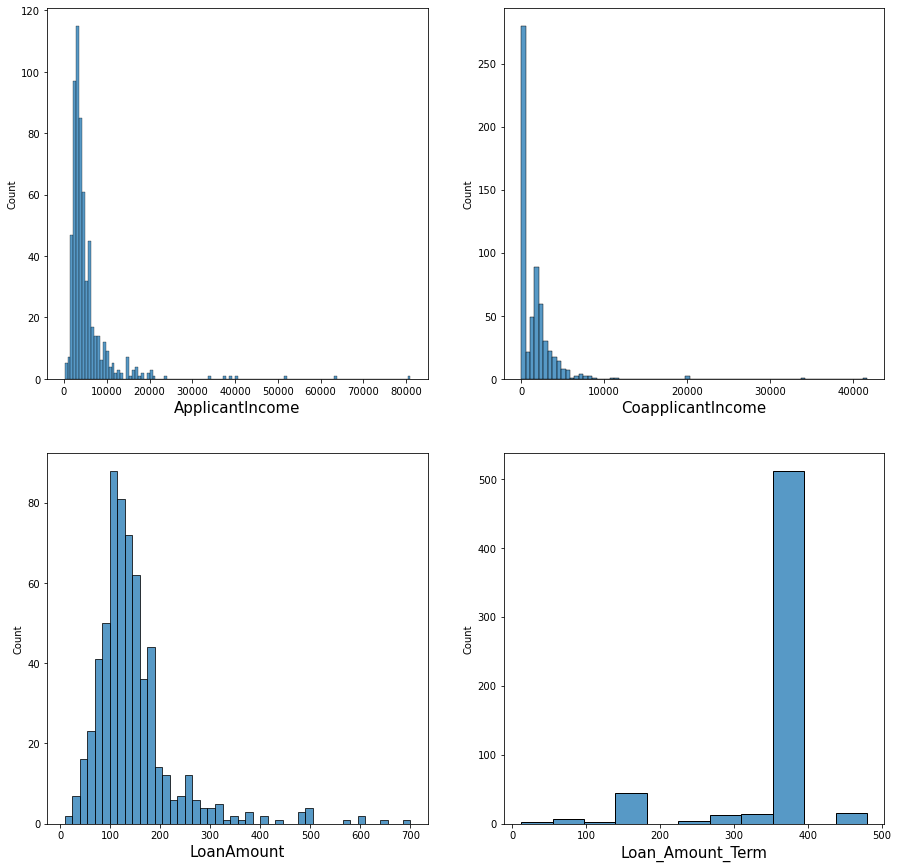

In [95]:
#Checking of histogram each columns having numerical data
plt.figure(figsize=(15,15))
pltno = 1
for columns in numerical:
    if pltno <=4:
        ax = plt.subplot(2,2,pltno)
        sns.histplot(df[columns])
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

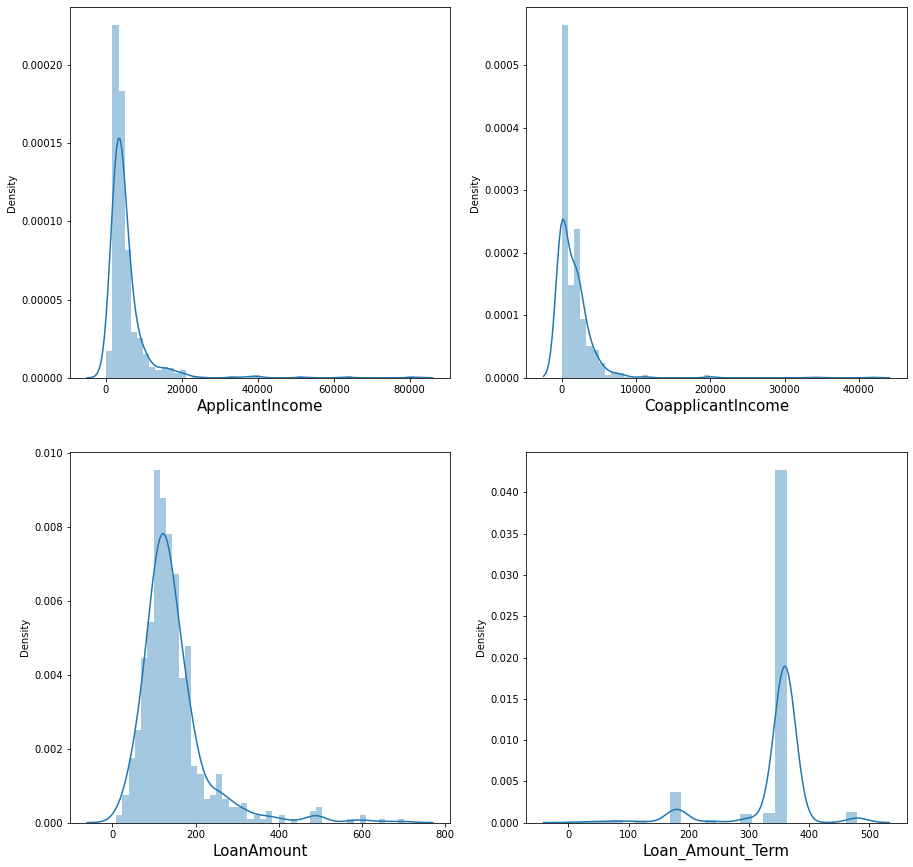

In [96]:
#Checking of distribution plot of each columns having numerical data
plt.figure(figsize=(15,15))
pltno = 1
for columns in numerical:
    if pltno <=4:
        ax = plt.subplot(2,2,pltno)
        sns.distplot(df[columns], kde = True)
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

Applicant income, Co-applicant income and loan amount are of right skewed data

Majority of Loan terms are of 350

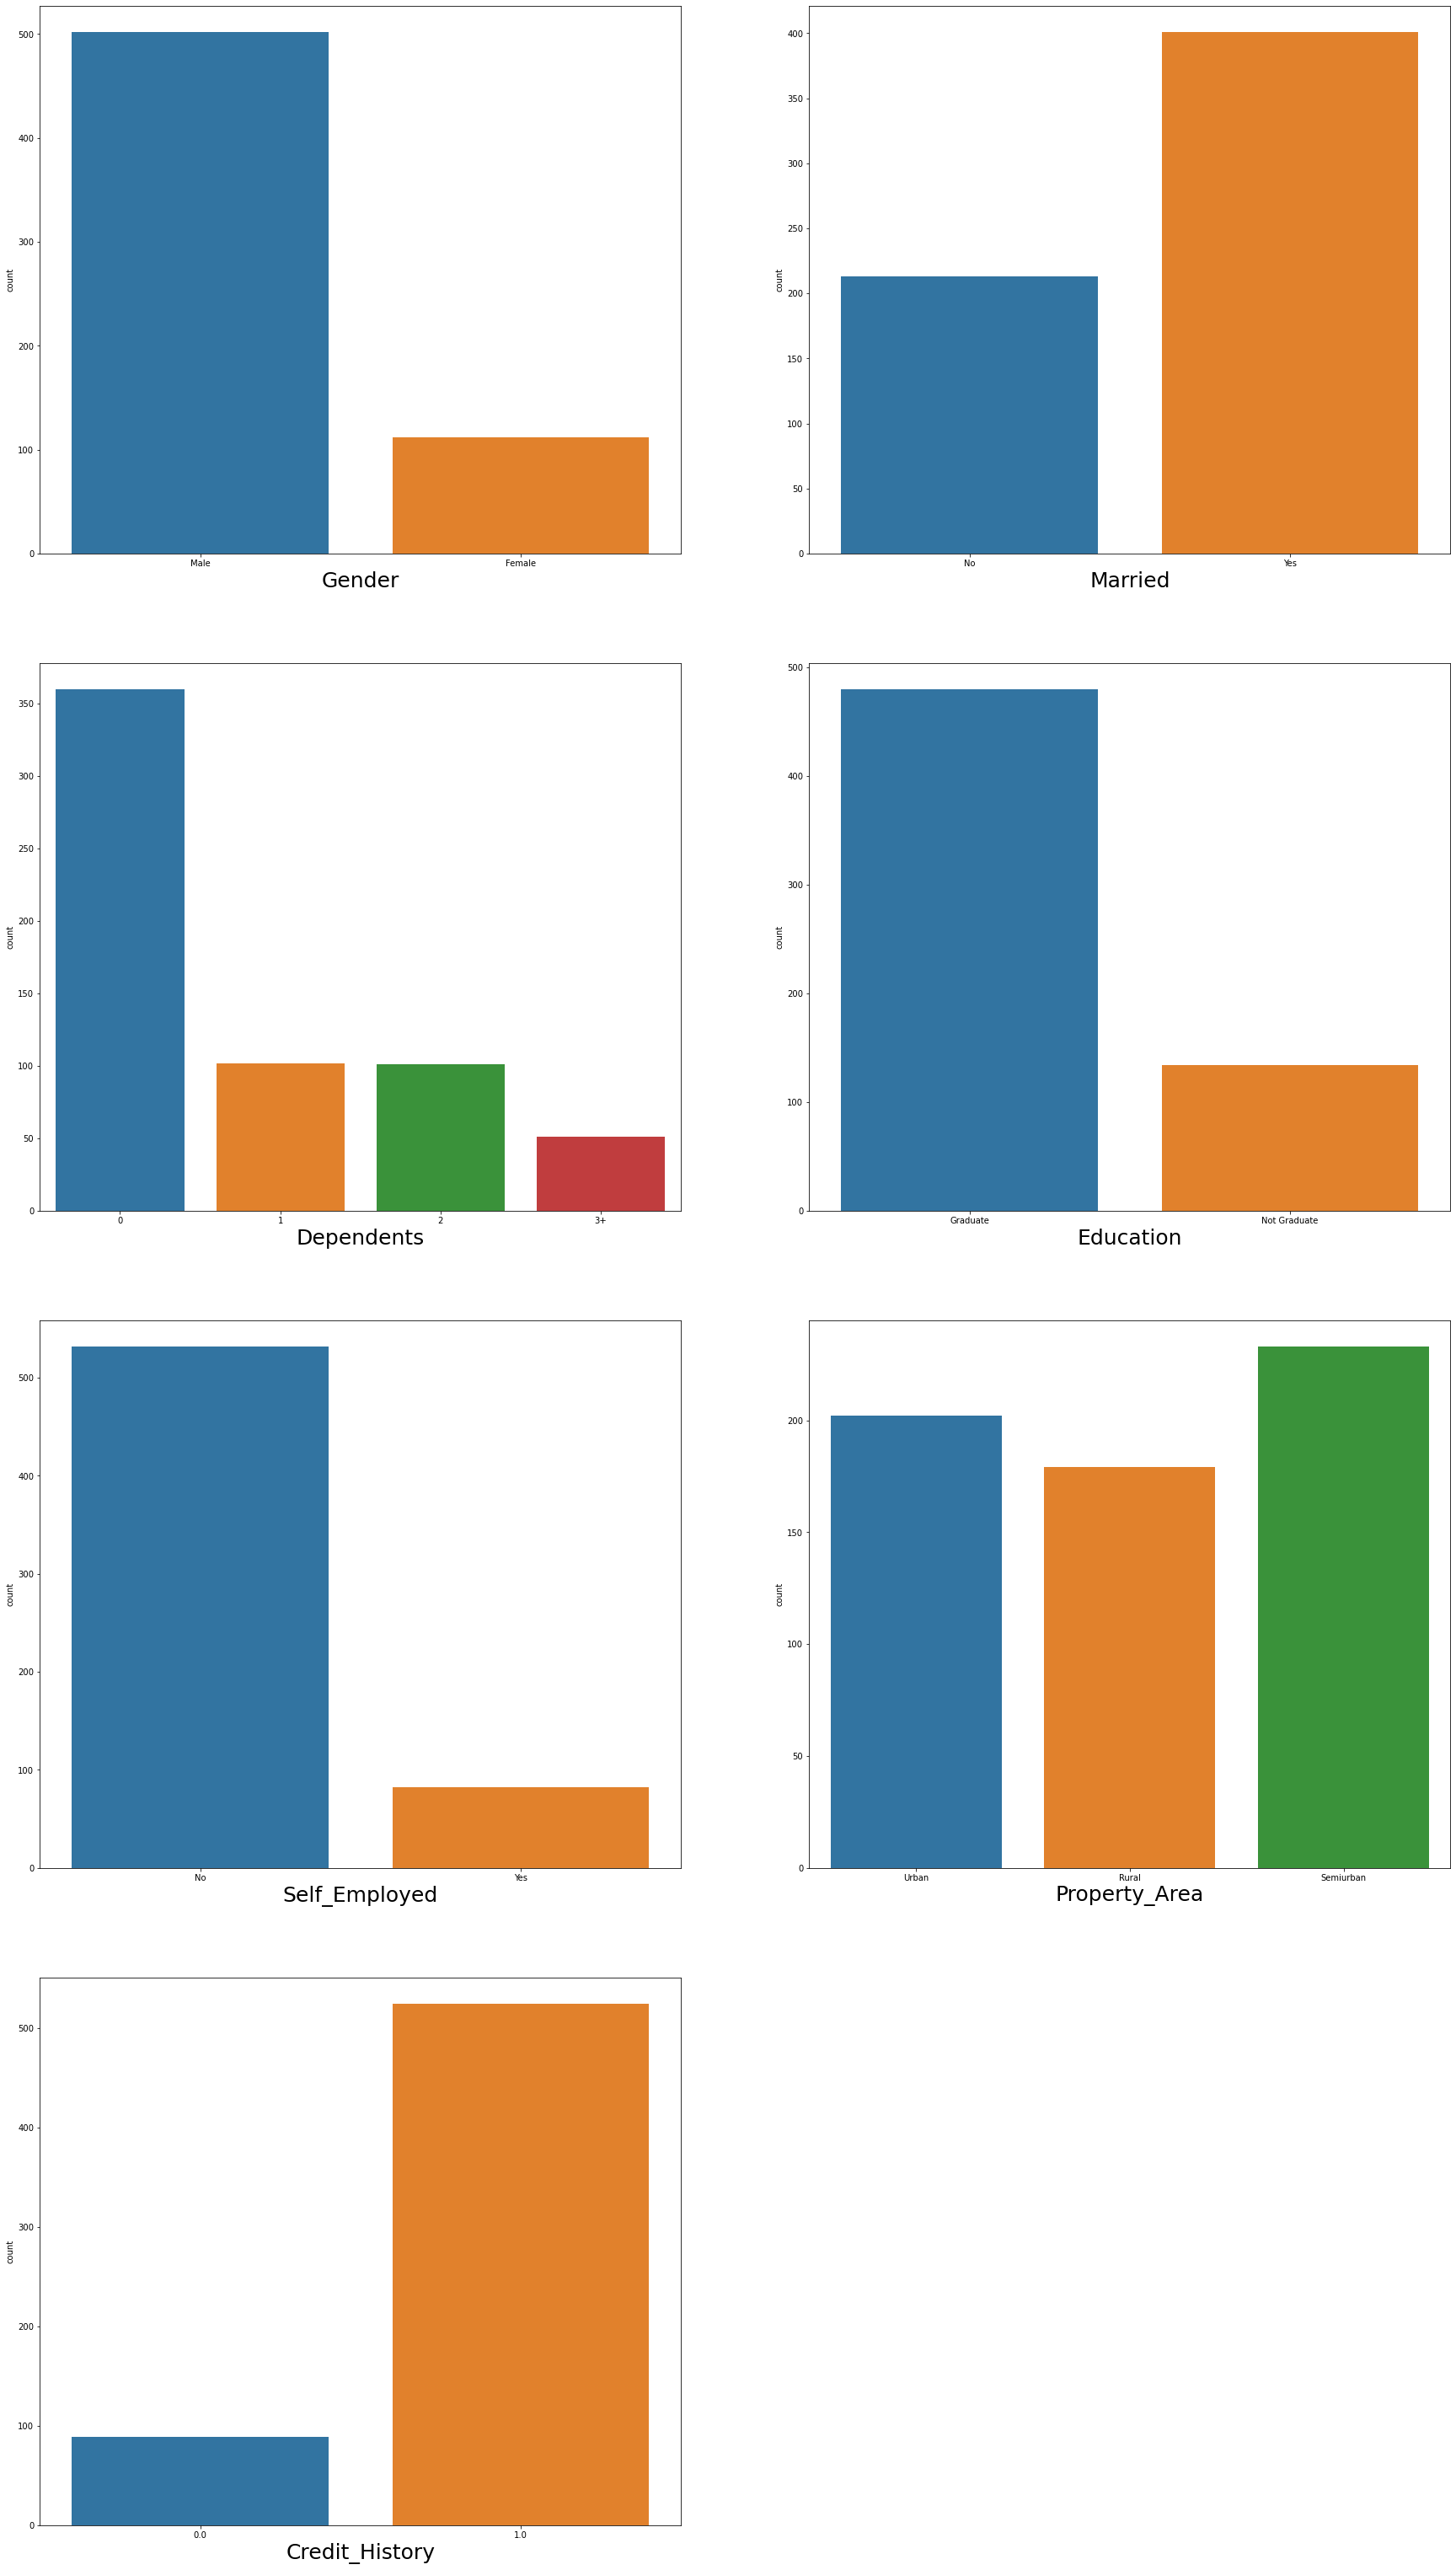

In [97]:
#Categorical
#Checking of value counts in each columns having categorical data
plt.figure(figsize=(30,55))
pltno = 1
for columns in categorical:
    if pltno <=8:
        ax = plt.subplot(4,2,pltno)
        sns.countplot(df[columns])
        plt.xlabel(columns, fontsize=25) 
    pltno += 1
plt.show()

Majority of applicants are: Male, married, having 0 dependents, graduates, self employed, living in semi urban area and having previous credit history

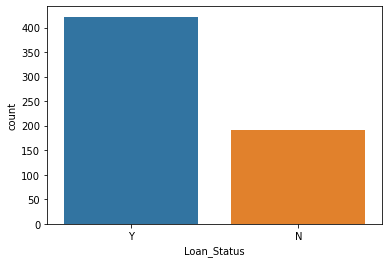

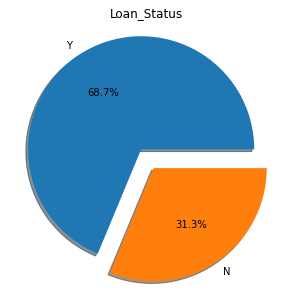

In [98]:
#Checking of value counts in target variable
sns.countplot(df['Loan_Status'])
plt.show()

var = 'Loan_Status'
plt.figure(figsize=(5,5))
data = list(df[var].value_counts())
plt.pie(data, labels= ['Y','N'], autopct='%1.1f%%', explode=[0.1,0.1], shadow=True)
plt.axis('equal')
plt.title(var)
plt.show()

Loan status is in ratio Y:N as 2:1
        
This can be balanced using oversampling technique for better prediction model performance

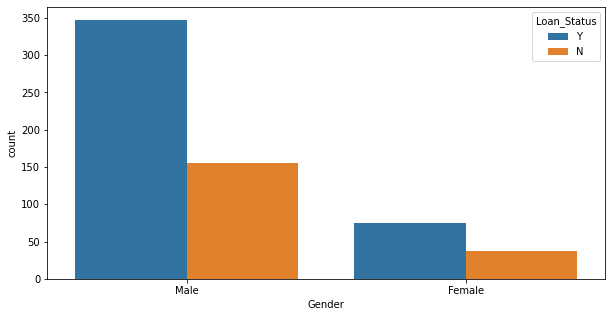

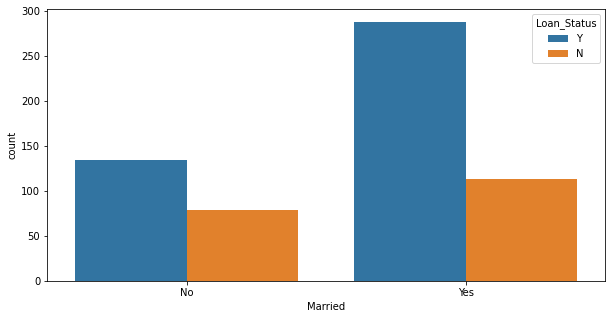

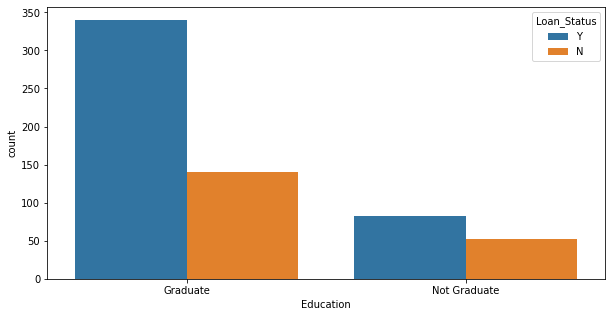

In [99]:
#Loan approval status among different genders
plt.figure(figsize=(10, 5))
sns.countplot(df['Gender'], hue=df['Loan_Status'])
plt.show()

#Loan approval status among different marrital status
plt.figure(figsize=(10, 5))
sns.countplot(df['Married'], hue=df['Loan_Status'])
plt.show()

#Loan approval status among different marrital status
plt.figure(figsize=(10, 5))
sns.countplot(df['Education'], hue=df['Loan_Status'])
plt.show()

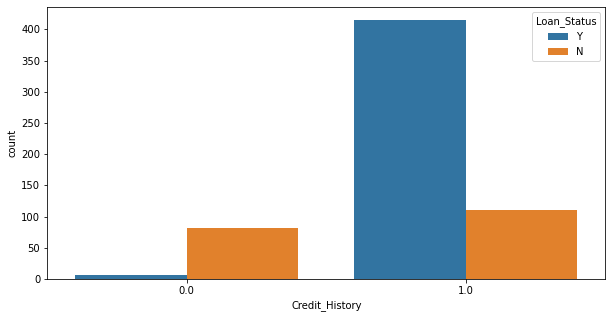

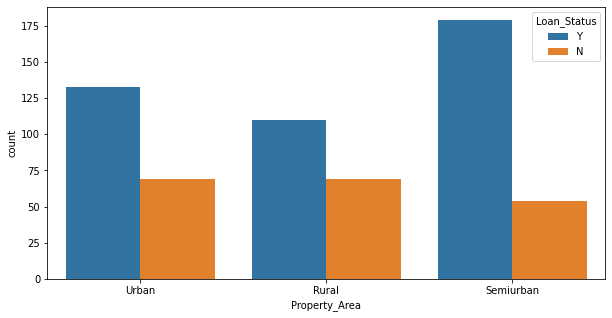

In [100]:
#Loan approval status based on credit history
plt.figure(figsize=(10, 5))
sns.countplot(df['Credit_History'], hue=df['Loan_Status'])
plt.show()

#Loan approval status among different area
plt.figure(figsize=(10, 5))
sns.countplot(df['Property_Area'], hue=df['Loan_Status'])
plt.show()

In [101]:
#Encoding the target data
df['Loan_Status'] = df['Loan_Status'].replace({"Y":1, "N":0 })

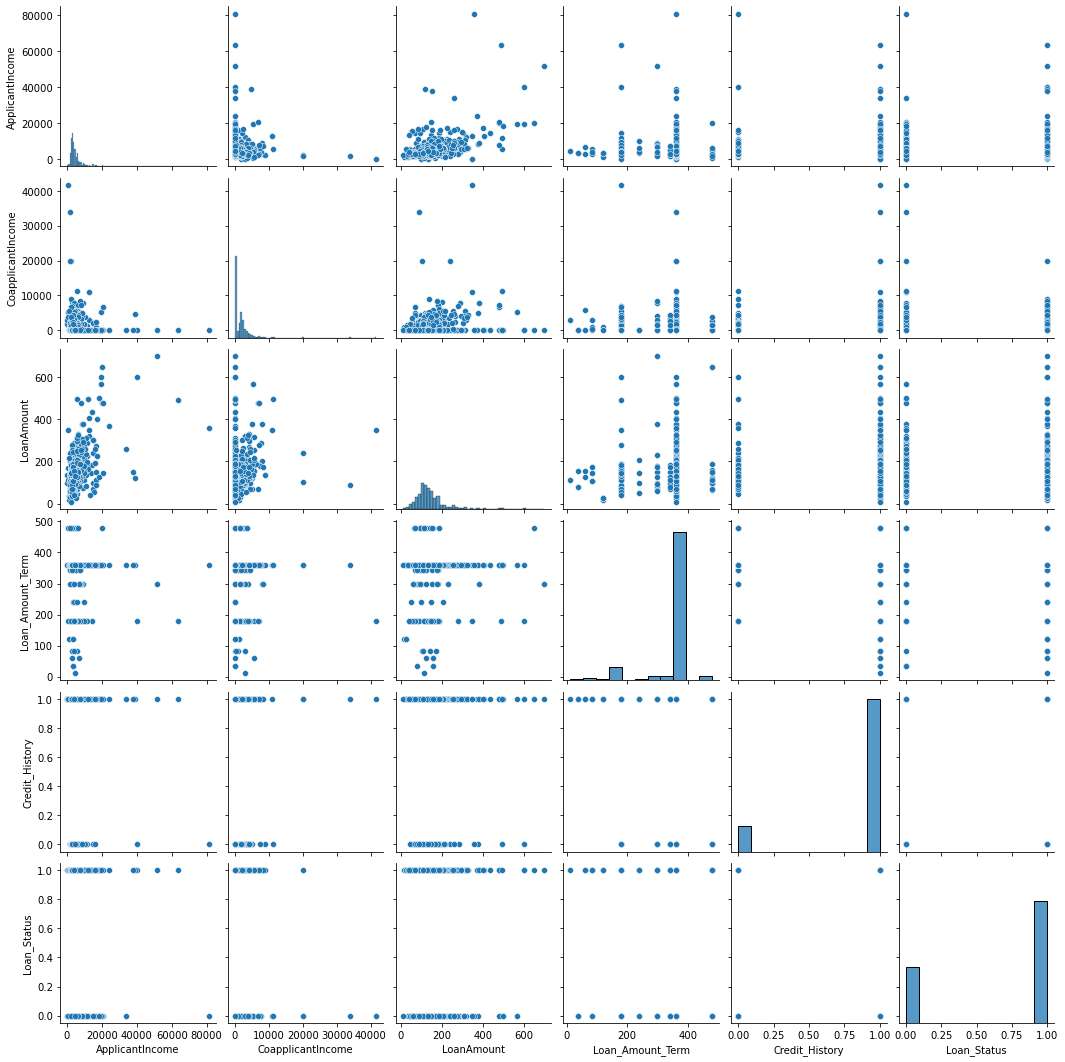

In [102]:
#Plotting all possible bivariate plots together
sns.pairplot(df)
plt.show()

Applicant income and loan amount exhibiting slight positive correlation

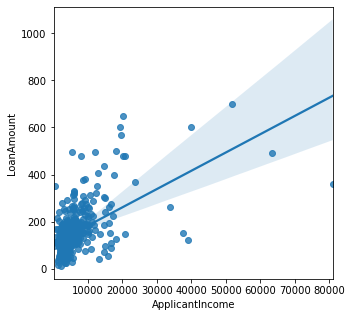

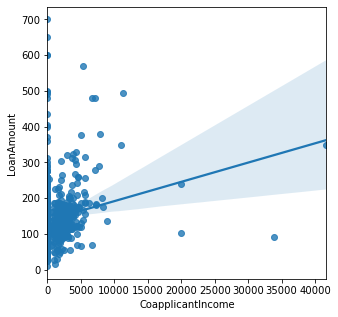

In [103]:
#Vizualization of '4046', '4225', '4770' correlation with total volume
plt.figure(figsize=(5,5))
sns.regplot(y = df['LoanAmount'], x = df['ApplicantIncome'])
plt.show()
plt.figure(figsize=(5,5))
sns.regplot(y = df['LoanAmount'], x = df['CoapplicantIncome'])
plt.show()

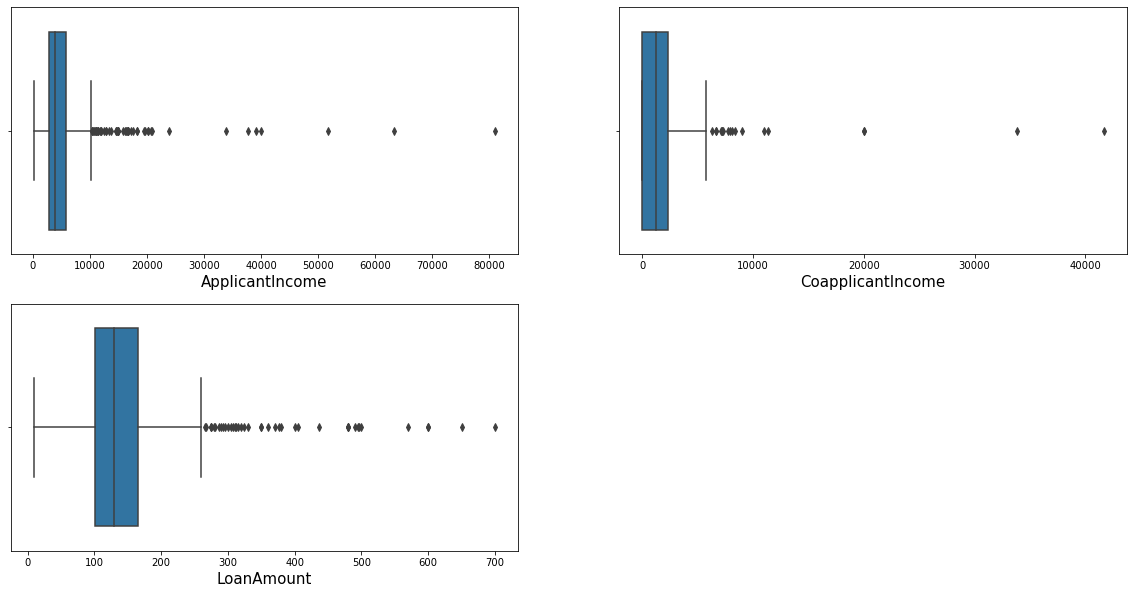

In [104]:
#Outliers/noise checking for input numerical feature columns
plt.figure(figsize=(20,10))
pltno = 1
for columns in numerical:
    if pltno <=3:
        ax = plt.subplot(2,2,pltno)
        sns.boxplot(x = df[columns])
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

These 3 input feature columns has outliers, need to be handled before training the model

In [105]:
#Statistical summary of the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [106]:
#Coefficient of correlation matrix
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.036416
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.020974
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.036416,-0.020974,0.540556,1.000000


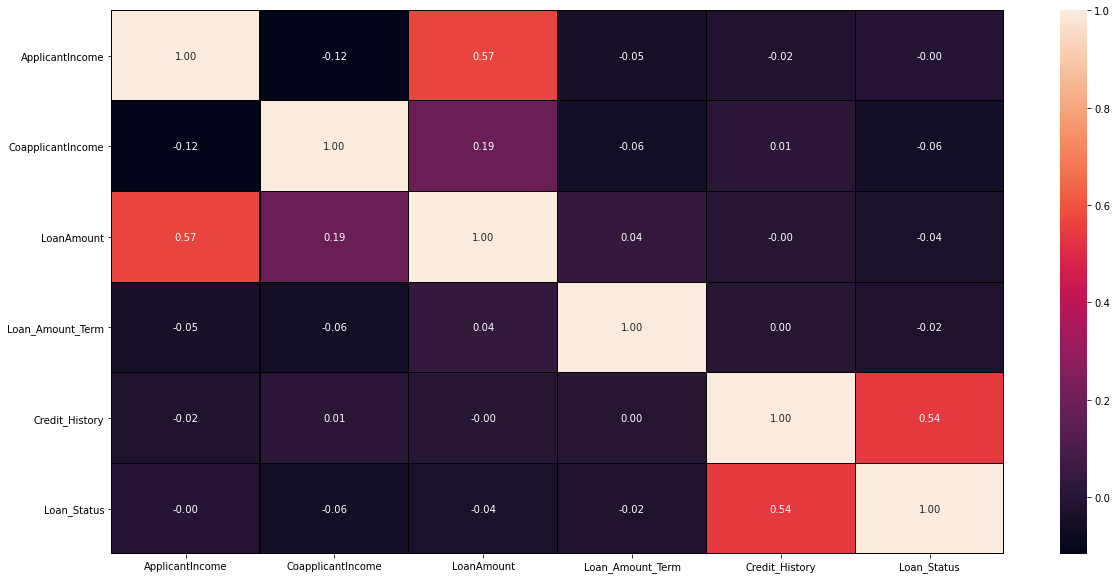

In [107]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

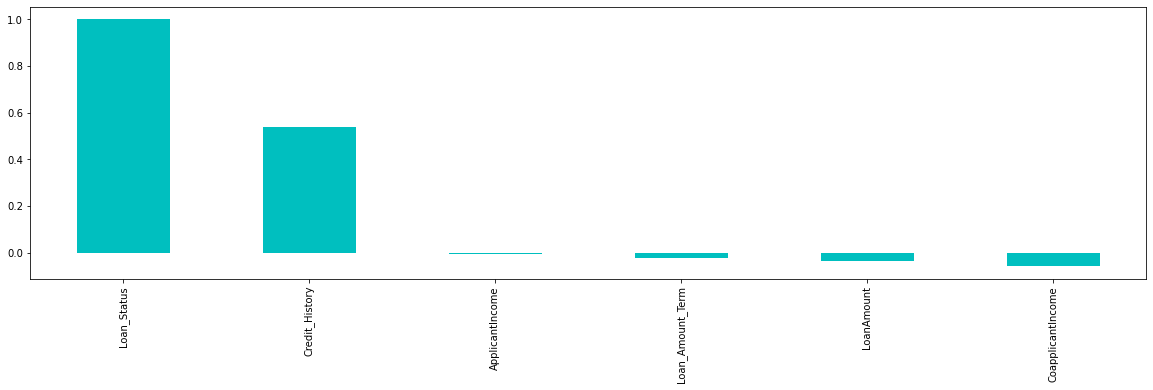

Loan_Status          1.000000
Credit_History       0.540556
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

In [108]:
#Sorting descending values of correlation data of target variable
#Plotting the same for vizualization
plt.figure(figsize=(20,5))
df.corr()['Loan_Status'].sort_values(ascending=False).plot(kind='bar', color='c')
plt.show()
df.corr()['Loan_Status'].sort_values(ascending=False)

In [109]:
#Checking of value counts in each columns categorical data
for i in categorical:
    print(df[i].value_counts(),'\n')

Male      502
Female    112
Name: Gender, dtype: int64 

Yes    401
No     213
Name: Married, dtype: int64 

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     532
Yes     82
Name: Self_Employed, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

1.0    525
0.0     89
Name: Credit_History, dtype: int64 



In [110]:
#Encoding the categorical/text type data into numerical form
df['Gender'] = df['Gender'].replace({"Male":1, "Female":0 })
df['Married'] = df['Married'].replace({"Yes":1, "No":0 })
df['Dependents'] = df['Dependents'].replace({"3+":3, "2":2, "1":1, "0":0})
df['Education'] = df['Education'].replace({"Graduate":1, "Not Graduate":0 })
df['Self_Employed'] = df['Self_Employed'].replace({"Yes":1, "No":0})
df['Property_Area'] = df['Property_Area'].replace({"Urban":2, "Semiurban":1, "Rural":0})

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [111]:
#Removing of outliers by zscore method
print('Shape before',df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]))
df_new = df[(z<3).all(axis=1)]
print('Shape after',df_new.shape)

#Percentage loss of data
loss = (df.shape[0]-df_new.shape[0])*100/(df.shape[0])
print(loss,'% loss of data')

Shape before (614, 12)
Shape after (589, 12)
4.071661237785016 % loss of data


In [112]:
#Seperate feature and target columns
x = df_new.drop('Loan_Status', axis=1)
y = df_new['Loan_Status']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (589, 11)
y shape (589,)


Feature selection method:

Since most of input data is discrete type and categorical type in nature, VIF method cannot be applied for checking multicollinearity

And we cannot handle multicollinearity by PCA technique

In order to handle feature selection (reduce curse of dimensionality / handling multicollinearity) let us use ExtraTreesClassifier method

In [113]:
#Feature selection
from sklearn.ensemble import ExtraTreesClassifier
fs = ExtraTreesClassifier()
fs.fit(x, y)

ExtraTreesClassifier()

In [114]:
imp = fs.feature_importances_
for index, val in enumerate(imp):
    print(index, round((val * 100), 2))

0 2.07
1 2.24
2 6.05
3 2.27
4 2.43
5 17.88
6 10.43
7 16.98
8 5.03
9 29.39
10 5.23


In [115]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             589 non-null    int64  
 1   Married            589 non-null    int64  
 2   Dependents         589 non-null    int64  
 3   Education          589 non-null    int64  
 4   Self_Employed      589 non-null    int64  
 5   ApplicantIncome    589 non-null    int64  
 6   CoapplicantIncome  589 non-null    float64
 7   LoanAmount         589 non-null    float64
 8   Loan_Amount_Term   589 non-null    float64
 9   Credit_History     589 non-null    float64
 10  Property_Area      589 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 55.2 KB


In [116]:
#Let us select top 70% important features and drop rest columns
#Dropping off less important columns
x =  x.drop(['Self_Employed', 'Married', 'Gender'], axis=1)

In [118]:
lis = ['ApplicantIncome','CoapplicantIncome','CoapplicantIncome']
x[lis].skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
CoapplicantIncome    1.353191
dtype: float64

Skewness is not within limit of <0.55

In [120]:
#Apply power transform to reduce skewness
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer()
for col in lis:
    if x.skew().loc[col]>0.55:
        x[col] = po.fit_transform(x[col].values.reshape(-1,1))
        
#Again checking skewnessof continuous feature variables
x[lis].skew()

ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
CoapplicantIncome   -0.186195
dtype: float64

Skewness is within allowable limit

In [121]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smt = SMOTE(1.0) #Up sampling to 1:1 ratio of target variable
x1, y1 = smt.fit_resample(x, y)

print('Before', Counter(y))
print('After', Counter(y1))

Before Counter({1: 407, 0: 182})
After Counter({1: 407, 0: 407})


In [122]:
x = x1
y = y1

#scaling of input feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [123]:
#Logistic regression
#Best randm state selection
max_acc = 0
max_RS = 0
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
lr = LogisticRegression()
for i in range(0,200):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr, ytr)
    predyt = lr.predict(xt)
    accuracy = accuracy_score(yt,predyt)  
    if accuracy > max_acc:
        max_acc = accuracy
        max_RS = i
        print('At Max RS',i,'Max Accuracy =',accuracy)

At Max RS 0 Max Accuracy = 0.7484662576687117
At Max RS 1 Max Accuracy = 0.8098159509202454
At Max RS 4 Max Accuracy = 0.8343558282208589
At Max RS 17 Max Accuracy = 0.8650306748466258


In [124]:
def metric_score(model, xtr, xt, ytr, yt, train=True):
    if train:
        ypr = model.predict(xtr)
        print(f"Accuracy score of train is : {(accuracy_score(ytr, ypr))*100:.2f}%")
        
    elif train==False:
        ypr = model.predict(xt)
        print(f"Accuracy score of test is : {(accuracy_score(yt, ypr))*100:.2f}%",'\n\nClassification report:')
        print(classification_report(yt, ypr))

In [125]:
#Using best random state for train test split
xtr, xt, ytr, yt = train_test_split(x,y, random_state=17,test_size=0.2)
#Training the model
model = LogisticRegression()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 77.11%
Accuracy score of test is : 86.50% 

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84        78
           1       0.81      0.96      0.88        85

    accuracy                           0.87       163
   macro avg       0.88      0.86      0.86       163
weighted avg       0.88      0.87      0.86       163



In [126]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8650306748466258
CV score at 2 = 0.7764127764127764
CV score at 3 = 0.7715659141885537
CV score at 4 = 0.7863541968511543
CV score at 5 = 0.7936529576611376
CV score at 6 = 0.7838507625272332
CV score at 7 = 0.7876089427813566
CV score at 8 = 0.7862914967967385
CV score at 9 = 0.784045584045584
CV score at 10 = 0.7901535682023487

Least difference of CV score and F1 score of testing is : 0.07137771718548813


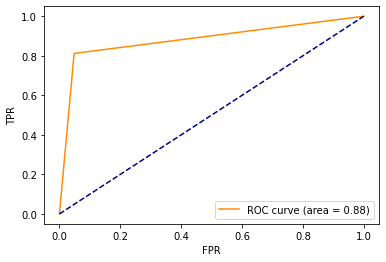

Confusion matrix:
 [[25 37]
 [33 68]] 

Area under curve = 0.8817470456723092


In [127]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(ypr,predyt),'\n')
print('Area under curve =',roc_auc)

In [128]:
#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Accuracy f1 score test' ,'CV score','F1-CV score diff',"Area under curve"])
model_result.loc[len(model_result.index)] = ['Logistic regression', acc, cvs, least_diff,roc_auc] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.865031,0.793653,0.071378,0.881747


In [143]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 82.21% 

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        78
           1       0.87      0.78      0.82        85

    accuracy                           0.82       163
   macro avg       0.83      0.82      0.82       163
weighted avg       0.83      0.82      0.82       163



In [144]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8220858895705522
CV score at 2 = 0.7432432432432432
CV score at 3 = 0.7568102886911222
CV score at 4 = 0.7629914034579349
CV score at 5 = 0.7740513519654624
CV score at 6 = 0.7580791575889615
CV score at 7 = 0.7643467643467644
CV score at 8 = 0.7776766647252962
CV score at 9 = 0.780369013702347
CV score at 10 = 0.7755796446853357

Least difference of CV score and F1 score of testing is : 0.04171687586820516


In [145]:
# Hyper parameter tuning for decision tree model
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':["gini", "entropy"],
              'splitter':["best", "random"],
              'max_depth':[4,6,8,10,12],
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       splitter='random')


In [150]:
#Training model as per best parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='log2', splitter='random')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 78.49%
Accuracy score of test is : 86.50% 

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.85        78
           1       0.82      0.94      0.88        85

    accuracy                           0.87       163
   macro avg       0.87      0.86      0.86       163
weighted avg       0.87      0.87      0.86       163



In [198]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8650306748466258
CV score at 2 = 0.7321867321867321
CV score at 3 = 0.7445237320020258
CV score at 4 = 0.732323964068386
CV score at 5 = 0.7801560251458002
CV score at 6 = 0.7445170660856936
CV score at 7 = 0.7691886657403899
CV score at 8 = 0.7285721219180741
CV score at 9 = 0.7778456111789445
CV score at 10 = 0.7692863595302619

Least difference of CV score and F1 score of testing is : 0.08487464970082559


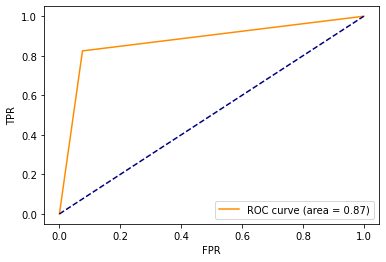

Confusion matrix:
 [[61 17]
 [ 5 80]] 

Area under curve = 0.8744923461418306


In [199]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [200]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Decision tree classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.865031,0.793653,0.071378,0.881747
1,Decision tree classifier,0.865031,0.780156,0.084875,0.874492


In [202]:
#Support vector machine classifier
from sklearn.svm import SVC
model = SVC()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 82.64%
Accuracy score of test is : 83.44% 

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        78
           1       0.81      0.89      0.85        85

    accuracy                           0.83       163
   macro avg       0.84      0.83      0.83       163
weighted avg       0.84      0.83      0.83       163



In [203]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8343558282208589
CV score at 2 = 0.7739557739557739
CV score at 3 = 0.7678577888720065
CV score at 4 = 0.7838851057664445
CV score at 5 = 0.7838294327046883
CV score at 6 = 0.7789578794480755
CV score at 7 = 0.7839143615005684
CV score at 8 = 0.7900286352164628
CV score at 9 = 0.7950888617555285
CV score at 10 = 0.7828214393255043

Least difference of CV score and F1 score of testing is : 0.039266966465330344


In [204]:
# Hyper parameter tuning for svc model
from sklearn.model_selection import GridSearchCV
parameters = {'gamma':['scale', 'auto'],
              'max_iter':range(50,500,50),
              'kernel':["linear", "poly", "rbf"],
              'tol':[0.0001,0.001,0.01]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

SVC(max_iter=150, tol=0.0001)


In [205]:
#Training model as per best parameters
model = SVC(max_iter=150, tol=0.0001)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 82.18%
Accuracy score of test is : 85.28% 

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        78
           1       0.81      0.93      0.87        85

    accuracy                           0.85       163
   macro avg       0.86      0.85      0.85       163
weighted avg       0.86      0.85      0.85       163



In [206]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.852760736196319
CV score at 2 = 0.7776412776412776
CV score at 3 = 0.7715387815642862
CV score at 4 = 0.7863059016710132
CV score at 5 = 0.7776262970536998
CV score at 6 = 0.7752450980392157
CV score at 7 = 0.7752410424824218
CV score at 8 = 0.7874927198602213
CV score at 9 = 0.7655134988468322
CV score at 10 = 0.7815115928937068

Least difference of CV score and F1 score of testing is : 0.06526801633609769


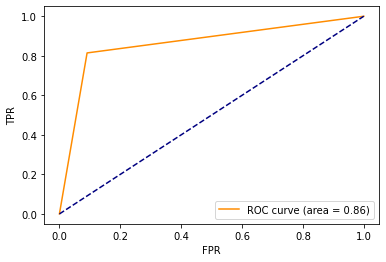

Confusion matrix:
 [[60 18]
 [ 6 79]] 

Area under curve = 0.8617619493908153


In [207]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [208]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Support vector classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.865031,0.793653,0.071378,0.881747
1,Decision tree classifier,0.865031,0.780156,0.084875,0.874492
2,Support vector classifier,0.852761,0.787493,0.065268,0.861762


In [210]:
#K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 85.25%
Accuracy score of test is : 78.53% 

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77        78
           1       0.78      0.82      0.80        85

    accuracy                           0.79       163
   macro avg       0.79      0.78      0.78       163
weighted avg       0.79      0.79      0.78       163



In [211]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.7852760736196319
CV score at 2 = 0.7542997542997543
CV score at 3 = 0.7383329715650099
CV score at 4 = 0.7531029653240606
CV score at 5 = 0.7591759448610165
CV score at 6 = 0.75439360929557
CV score at 7 = 0.7543998147446423
CV score at 8 = 0.756697728596389
CV score at 9 = 0.7593406593406594
CV score at 10 = 0.7556760012044565

Least difference of CV score and F1 score of testing is : 0.0259354142789725


In [212]:
# Hyper parameter tuning for KNN model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_neighbors':range(4,10), 
              'weights':['uniform','distance'], 
              'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'leaf_size':[15,25,30,35]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

KNeighborsClassifier(leaf_size=15, n_neighbors=4, weights='distance')


In [213]:
#Training model as per best parameters
model = KNeighborsClassifier(leaf_size=15, n_neighbors=4, weights='distance')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 82.21% 

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        78
           1       0.83      0.82      0.83        85

    accuracy                           0.82       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.82      0.82      0.82       163



In [214]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8220858895705522
CV score at 2 = 0.7678132678132679
CV score at 3 = 0.7788962448448015
CV score at 4 = 0.7776791751183232
CV score at 5 = 0.7812997046125881
CV score at 6 = 0.7765068990559186
CV score at 7 = 0.7826723085343775
CV score at 8 = 0.7875655212580082
CV score at 9 = 0.7963098629765297
CV score at 10 = 0.7889039445950015

Least difference of CV score and F1 score of testing is : 0.02577602659402245


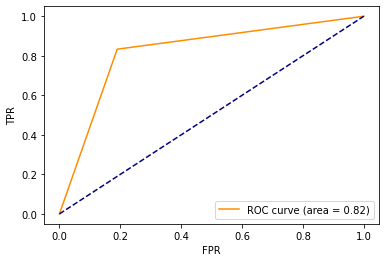

Confusion matrix:
 [[64 14]
 [15 70]] 

Area under curve = 0.8217299578059072


,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.865031,0.793653,0.071378,0.881747
1,Decision tree classifier,0.865031,0.780156,0.084875,0.874492
2,Support vector classifier,0.852761,0.787493,0.065268,0.861762
3,KNN classifier,0.822086,0.796310,0.025776,0.821730


In [215]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['KNN classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

In [218]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 83.72%
Accuracy score of test is : 85.89% 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        78
           1       0.84      0.89      0.87        85

    accuracy                           0.86       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.86      0.86      0.86       163



In [219]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8588957055214724
CV score at 2 = 0.7628992628992629
CV score at 3 = 0.7642039288039939
CV score at 4 = 0.7826958369554718
CV score at 5 = 0.7875558585170037
CV score at 6 = 0.7850853304284677
CV score at 7 = 0.7889667803460908
CV score at 8 = 0.7912662589788391
CV score at 9 = 0.7903133903133903
CV score at 10 = 0.7866004215597713

Least difference of CV score and F1 score of testing is : 0.06762944654263336


In [220]:
# Hyper parameter tuning for adaboost model
from sklearn.model_selection import GridSearchCV
parameters = { 'algorithm':['SAMME', 'SAMME.R'], 
              'n_estimators':[100,200,300,400], 
              'learning_rate' :[0.01, 0.1,1], 
              'random_state':[15,25,50,75]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

AdaBoostClassifier(learning_rate=1, n_estimators=300, random_state=15)


In [232]:
#Training model as per best parameters
model = AdaBoostClassifier(learning_rate=1, n_estimators=300, random_state=15)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 77.42%
Accuracy score of test is : 86.50% 

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84        78
           1       0.81      0.98      0.88        85

    accuracy                           0.87       163
   macro avg       0.89      0.86      0.86       163
weighted avg       0.88      0.87      0.86       163



In [233]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8650306748466258
CV score at 2 = 0.7714987714987716
CV score at 3 = 0.7752649952970119
CV score at 4 = 0.7790193663672365
CV score at 5 = 0.7789441793531774
CV score at 6 = 0.7802378358750909
CV score at 7 = 0.7815670919119195
CV score at 8 = 0.7814138031450204
CV score at 9 = 0.7779677113010446
CV score at 10 = 0.7829268292682927

Least difference of CV score and F1 score of testing is : 0.08210384557833306


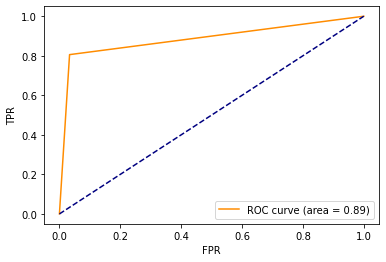

Confusion matrix:
 [[58 20]
 [ 2 83]] 

Area under curve = 0.8862459546925566


,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.865031,0.793653,0.071378,0.881747
1,Decision tree classifier,0.865031,0.780156,0.084875,0.874492
2,Support vector classifier,0.852761,0.787493,0.065268,0.861762
3,KNN classifier,0.822086,0.796310,0.025776,0.821730
4,Adaboost classifier,0.865031,0.782927,0.082104,0.886246


In [234]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Adaboost classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

In [264]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 89.57% 

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        78
           1       0.88      0.93      0.90        85

    accuracy                           0.90       163
   macro avg       0.90      0.89      0.90       163
weighted avg       0.90      0.90      0.90       163



In [265]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8957055214723927
CV score at 2 = 0.7923832923832923
CV score at 3 = 0.8010681209753274
CV score at 4 = 0.8121679706365305
CV score at 5 = 0.8194652730440051
CV score at 6 = 0.8281862745098039
CV score at 7 = 0.8295334933265969
CV score at 8 = 0.8343404193360513
CV score at 9 = 0.8259937593270927
CV score at 10 = 0.8296747967479675

Least difference of CV score and F1 score of testing is : 0.06136510213634139


In [283]:
# Hyper parameter tuning for random forest model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators':[100,150,200], 
              'criterion':["entropy",'gini'], 
              'max_depth' :[4, 8, 14, 16], 
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features='log2')


In [290]:
#Training model as per best parameters
model = RandomForestClassifier(criterion='entropy', max_depth=14, max_features='log2')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 99.85%
Accuracy score of test is : 91.41% 

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        78
           1       0.89      0.95      0.92        85

    accuracy                           0.91       163
   macro avg       0.92      0.91      0.91       163
weighted avg       0.92      0.91      0.91       163



In [292]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.9141104294478528
CV score at 2 = 0.8058968058968059
CV score at 3 = 0.810912741480356
CV score at 4 = 0.806046556553656
CV score at 5 = 0.8317730818753313
CV score at 6 = 0.8207970225127088
CV score at 7 = 0.8356911287945772
CV score at 8 = 0.8330542613084837
CV score at 9 = 0.8235653235653236
CV score at 10 = 0.8186991869918699

Least difference of CV score and F1 score of testing is : 0.07841930065327563


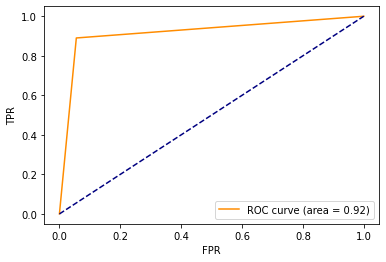

Confusion matrix:
 [[68 10]
 [ 4 81]] 

Area under curve = 0.9172771672771672


,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.865031,0.793653,0.071378,0.881747
1,Decision tree classifier,0.865031,0.780156,0.084875,0.874492
2,Support vector classifier,0.852761,0.787493,0.065268,0.861762
3,KNN classifier,0.822086,0.796310,0.025776,0.821730
4,Adaboost classifier,0.865031,0.782927,0.082104,0.886246
5,Random forest classifier,0.914110,0.835691,0.078419,0.917277


In [293]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Random forest classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

KNN classifier is giving best result if we consider F1-CV score diff, but AUC is minimum there

But by considerin both AUC and F1-CVscore as best deciding parameters, we can choose Random forest classifier for our predictions

In [294]:
#Prediction using selected best model
model = RandomForestClassifier(criterion='entropy', max_depth=14, max_features='log2')
model.fit(xtr,ytr)
predyt = model.predict(xt)

In [297]:
table = pd.DataFrame()
table['Actual Loan approval status'] = ['No' if i==0 else 'Yes' for i in yt]
table['Predicted Loan approval status'] = ['No' if i==0 else 'Yes' for i in predyt]
table.sample(10)

,Actual Loan approval status,Predicted Loan approval status
135,Yes,Yes
37,Yes,Yes
122,No,No
52,Yes,Yes
23,No,No
27,No,No
155,Yes,No
29,No,No
134,No,No
53,Yes,Yes


In [298]:
#Saving the model
import pickle
filename='Loan.pkl'
pickle.dump(model,open(filename,'wb'))